In [1]:
# sample data from data.world on diabetic predictions from 
# a biostatistics program conducted Vanderbilt University
# School of Medicine

# regression data
# column 0: cholesterol
# column 1: waist size
# column 2: male = 1, female = 0
data = ([
[220,33,1],[194,33,0],[191,53,0],[245,37,1],[203,48,0],
[267,40,0],[190,40,0],[207,46,0],[219,41,1],[245,35,0],
[173,42,1],[160,49,1],[237,43,0],[181,56,1],[140,37,1],
[215,52,0],[218,42,0],[443,43,0],[196,34,0],[242,43,1],
[296,35,1],[179,38,1],[219,41,0],[404,38,1],[209,36,0],
[115,30,1],[193,38,0],[195,38,0],[219,37,1],[289,36,1],
[279,48,0],[128,42,1],[203,36,0],[211,40,0],[265,39,1],
[235,55,0],[196,46,0],[283,44,0],[215,34,0],[342,45,0],
[181,44,1],[249,44,1],[249,33,0],[159,43,1],[224,42,1],
[246,45,0],[204,36,1],[254,36,1],[182,45,1],[289,51,0],
[213,34,0],[207,39,1],[237,38,0],[296,42,0],[254,44,1],
[209,35,0],[292,39,1],[252,44,0],[226,41,0],[232,35,0],
])

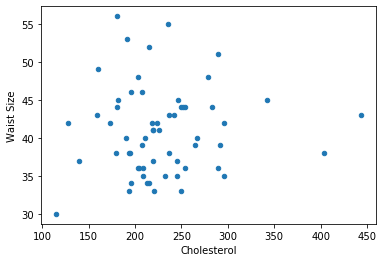

In [3]:
# visualise our data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
df.columns = ['Cholesterol', 'Waist Size', 'Gender']
df.plot(x ='Cholesterol', y='Waist Size', kind = 'scatter')

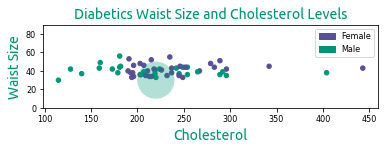

In [4]:
# example of applying brand styles to charts
import os
import matplotlib.patches as pat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import colors

# sets the scatter colours based on gender value in dataset. an alternatice
# would be to use a custom colour map in the df.plot.scatter invocation but
# you would have to format the colour bar that is created.
def setColour():
    cols=[]
    for row in data:
        if (row[2]==0):
            cols.append('#585094')
        elif (row[2]==1):
            cols.append('#009578')
    return cols

SMALL_FONT = 8
MEDIUM_FONT = 12
LARGE_FONT = 14
TRIAD_GREEN = '#009578'
plt.rc('font', size=LARGE_FONT)         
plt.rc('axes', titlesize=LARGE_FONT)     
plt.rc('axes', labelsize=LARGE_FONT)    
plt.rc('xtick', labelsize=SMALL_FONT)    
plt.rc('ytick', labelsize=SMALL_FONT)    
plt.rc('legend', fontsize=SMALL_FONT)    
plt.rc('figure', titlesize=LARGE_FONT)  
ubuntu = fm.FontProperties(fname='files/Ubuntu-R.ttf')
colours = ['#585094','#009578']

df = pd.DataFrame(data)
cols = setColour()
df.columns = ['Cholesterol', 'Waist Size', 'Gender']
#ax = df.plot.scatter(x ='Cholesterol', y='Waist Size', c=cols)
ax = df.plot.scatter(x ='Cholesterol', y='Waist Size', c=df['Gender'].apply(lambda x: colours[x]))

# we need to tweak the chart above as the x and y axis are not equal and our
# circle would be rendered as an ellipse. we also limit the y scale to reduce whitespace
ax.set_aspect('equal')
ax.set_ylim([0,90])
ax.set_xlabel('Cholesterol',color=TRIAD_GREEN,fontproperties=ubuntu)
ax.set_ylabel('Waist Size', color=TRIAD_GREEN,fontproperties=ubuntu)
circle = pat.Circle(xy=(220, 30), radius=20, alpha=0.3, facecolor=TRIAD_GREEN)
ax.add_patch(circle)

# alternative custom legend using the same patch technique we used for the circle
leg1 = pat.Patch(color='#585094', label='Female')
leg2 = pat.Patch(color='#009578', label='Male')
plt.legend(handles=[leg1, leg2])

plt.title("Diabetics Waist Size and Cholesterol Levels", fontproperties=ubuntu,color=TRIAD_GREEN, fontweight='bold')
plt.show()

In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

X = np.array(data)
K = 2
nbrs = NearestNeighbors(n_neighbors=K, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

In [6]:
#%%capture capt
!pip install colored 
# terminal colours
from colored import fg, bg, attr
colour= fg('#009578')
reset=attr('reset')

In [7]:
# K nearest neighbour regression, the average of the values of K nearest neighbours.
# we'll use scikit-learn to avoid having to code this https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm 
from sklearn.neighbors import KNeighborsRegressor

# dataset (X=cholesterol, y=waist size)
dataset = np.array(data)
X = dataset[:,0:1]
y = dataset[:,1]

# run a number of predictions by decreasing the number of nearest neighbours
print(colour + 'Predicted waist size for cholesterol levels of 150, 220 and 300 is:'+ reset)
for k in range(10, 2, -2):
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X, y)
    print('K={0:2}: '.format(str(k)), end=(''))
    print(neigh.predict([[150],[220],[300]]).round(1))
print(colour+'Finished'+reset)

Predicted waist size for cholesterol levels of 150, 220 and 300 is:
K=10: [42.6 39.7 41.9]
K=8 : [43.9 40.2 41.9]
K=6 : [41.8 39.3 41.2]
K=4 : [42.8 38.  38. ]
Finished


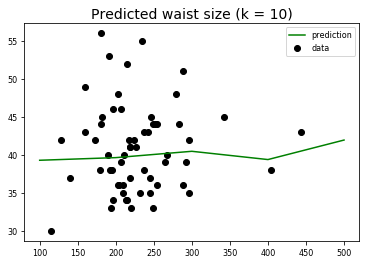

In [12]:
# to be revisited and recharted with additional data points.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

# dataset (X=cholesterol, y=waist size, T=array of cholesterol levels for prediction)
dataset = np.array(data)
X = dataset[:,0:1]
y = dataset[:,1]
T = [[100],[200],[300],[400],[500]]

# fit regression model to 10 nearest neighbours
n_neighbors = 10
knn = neighbors.KNeighborsRegressor(n_neighbors, weights='distance')
y_ = knn.fit(X, y).predict(T)

# plot data and prediction
plt.scatter(X, y, c='k', label='data')
plt.plot(T, y_, c='g', label='prediction')
plt.legend()
plt.title("Predicted waist size (k = %i)" % n_neighbors)
plt.show()